In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
input_path = "../data/notes_all.csv"

In [3]:
# Read data
df = pd.read_csv(input_path);
df = df.dropna();

In [4]:
# Remove column NOM
xdf = df.drop(columns=['NOM'])

In [5]:
#create scaled DataFrame where each variable has mean of 0 and standard dev of 1
scaled_df = StandardScaler().fit_transform(xdf)

c:\Users\bouba\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bouba\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bouba\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\bouba\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: User

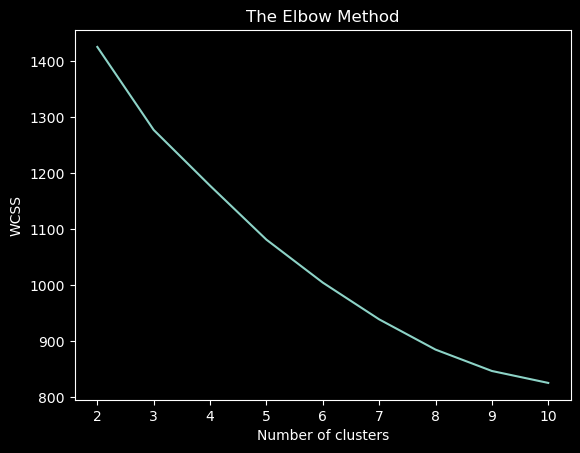

In [6]:
# Find optimal clusters number
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
labels =kmeans.labels_


c:\Users\bouba\miniconda3\envs\infoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [9]:
#append cluster assingments to original DataFrame
df["cluster"] = labels

#view updated DataFrame
print(df.head())

   NOM   TP2   TP3   TP4   TP5   TP6  TP7  EXAM  cluster
67  T3  14.0  17.0  13.0  13.0  17.0   12   7.0        1
68  T4  15.0  12.0  13.0  12.0  17.0   15  11.0        1
69  T5  13.0  10.0   8.0   6.0  11.0   12  12.0        2
70  T6  10.0  17.0   8.0  11.0  12.0   13  10.0        2
71  T7  13.0  12.0  15.0  11.0  13.0   11   7.0        2
